# Pathrise Project

### Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



In [2]:
# Load the dataset
df=pd.read_excel('Data_Pathrise.xlsx')


In [3]:
df1=df

In [4]:
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [6]:
#Get a summary of the basic statistics of the numerical variables

df.describe()


,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [7]:
print(df.columns)

Index(['id', 'pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')


# Data Visualization

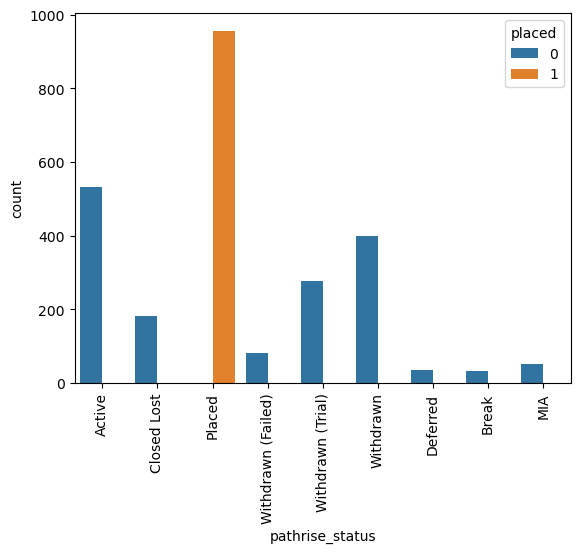

In [8]:
sns.countplot(x='pathrise_status',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

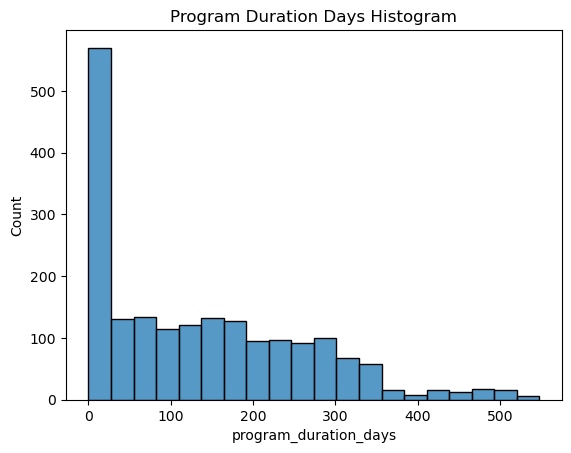

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

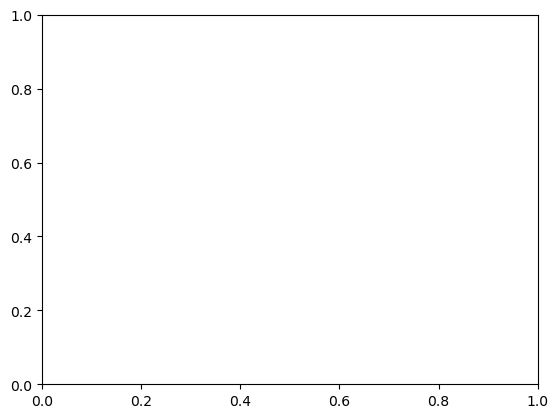

In [9]:
#Histogram for 'program_duration_days'
sns.histplot(data=df, x='program_duration_days', bins=20)
plt.title('Program Duration Days Histogram')

plt.show()


sns.kdeplot(data=df, x='program_duration_days', hue='placed', fill=True, alpha=0.4)
plt.xlabel('Program Duration Days')
plt.title('Density Plot of Program Duration Days by Placed')
plt.show()


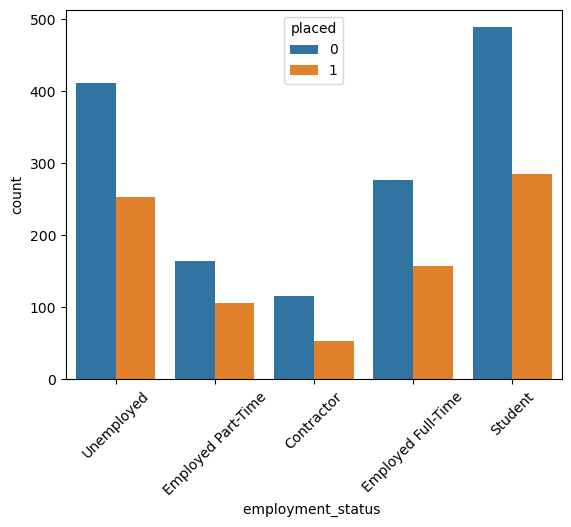

In [10]:
sns.countplot(x='employment_status ',data=df,hue='placed')
plt.xticks(rotation=45)
plt.show()

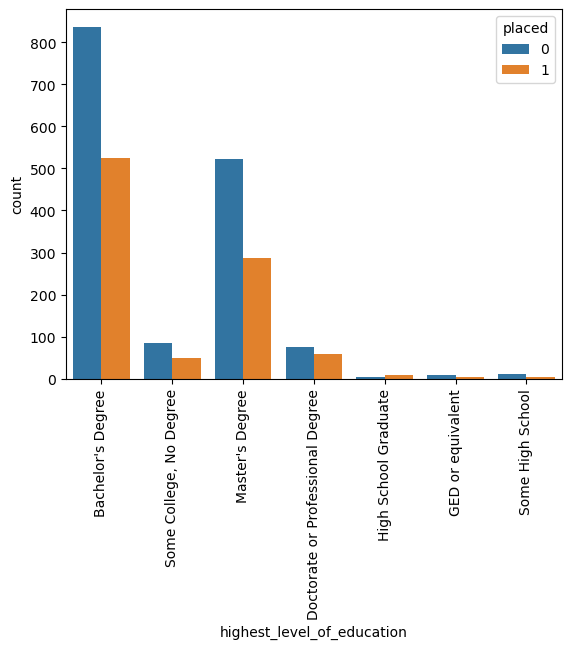

In [11]:
sns.countplot(x='highest_level_of_education',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()


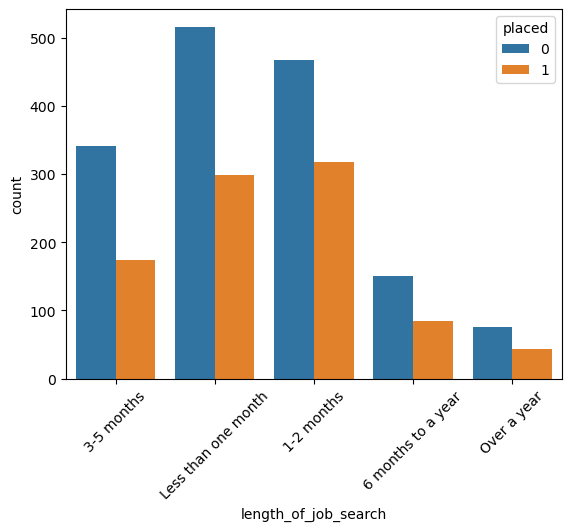

In [12]:
sns.countplot(x='length_of_job_search',data=df,hue='placed')
plt.xticks(rotation=45)
plt.show()

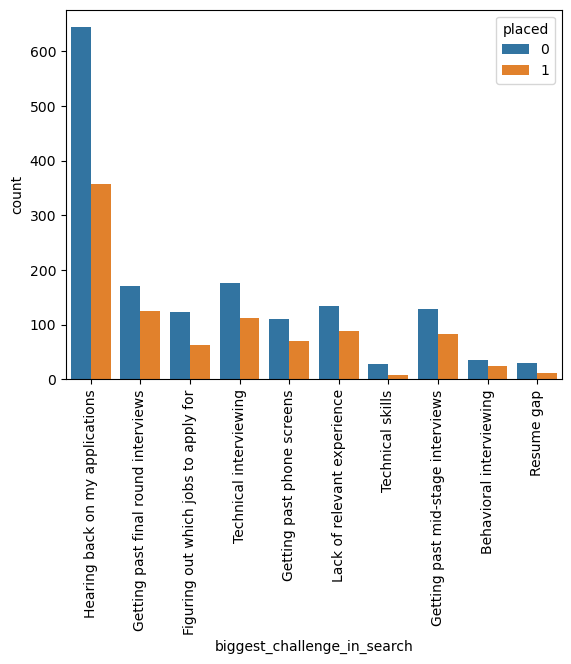

In [13]:
sns.countplot(x='biggest_challenge_in_search',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

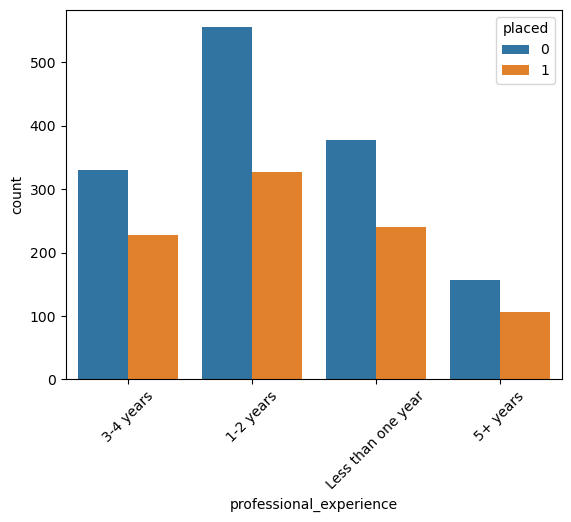

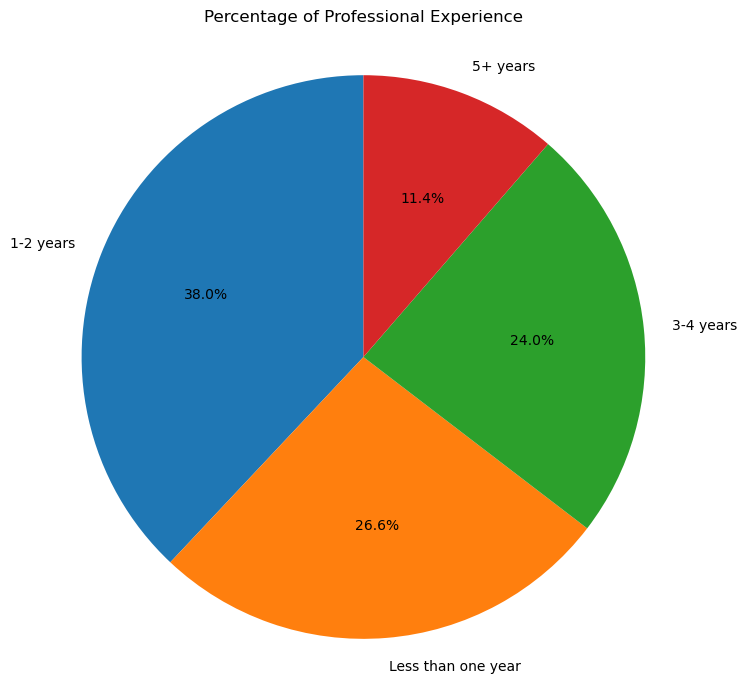

In [14]:
sns.countplot(x='professional_experience',data=df,hue='placed')
plt.xticks(rotation=45)
plt.show()


professional_experience_counts = df['professional_experience'].value_counts()
total_entries = len(df)
percentages = (professional_experience_counts / total_entries) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Professional Experience', pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

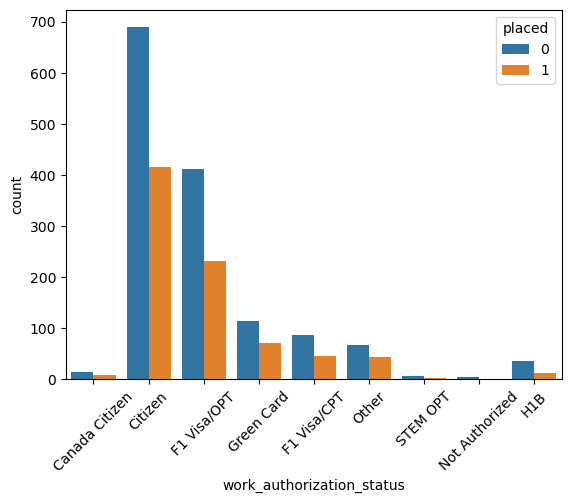

In [15]:
sns.countplot(x='work_authorization_status',data=df,hue='placed')
plt.xticks(rotation=45)
plt.show()

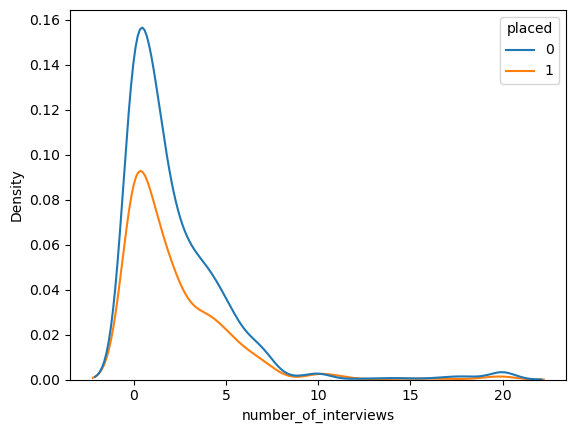

In [16]:
sns.kdeplot(data=df ,x='number_of_interviews', hue='placed')
plt.show()

#sns.kdeplot(data=df, x='number_of_interviews', hue='placed', fill=True, alpha=0.4)
#plt.xlabel('number_of_interviews')
#plt.title('Density Plot of number_of_interviews')
#plt.show()



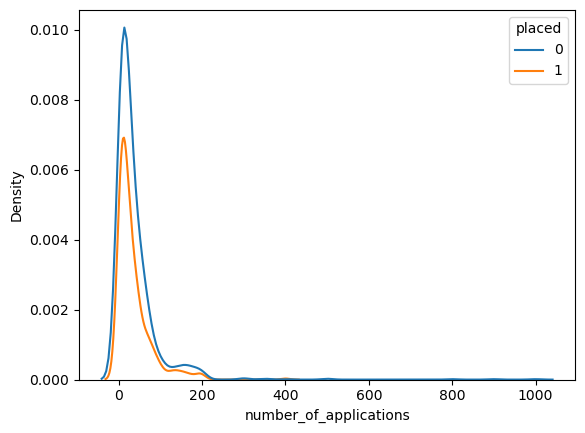

In [17]:
sns.kdeplot(data=df ,x='number_of_applications', hue='placed')
plt.show()



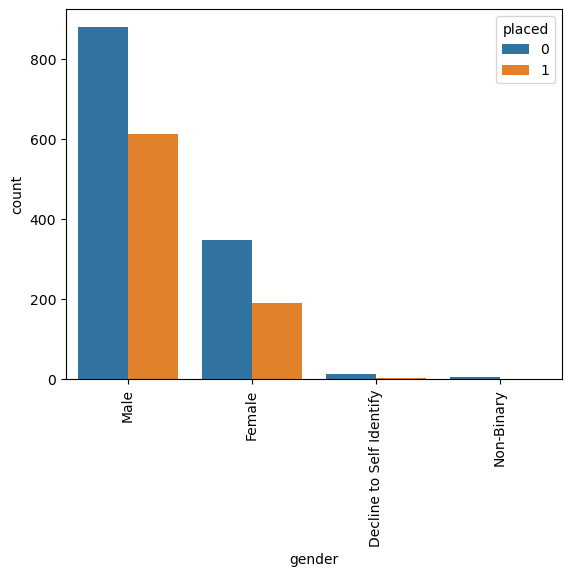

In [18]:
sns.countplot(x='gender',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

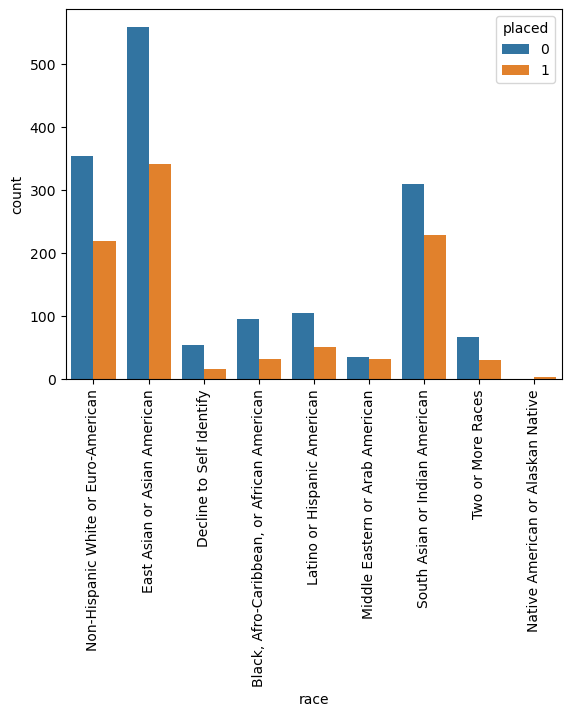

In [19]:
sns.countplot(x='race',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

# Test for Drop

In [20]:

df[(df['pathrise_status']=="Active")
      &(df['placed']==0)]['placed'].count()     #Active and Placed is 0

532

In [21]:
df[(df['pathrise_status']=="Withdrawn (Trial)")
      &(df['placed']==0)]['placed'].count()       #Withdrawn (Trial) and Placed is 0 

276

In [22]:
df[df['pathrise_status']=='Withdrawn (Trial)']

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
9,10,Withdrawn (Trial),SWE,SEP19A,13.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past final round interviews,3-4 years,Citizen,0.0,10,Male,"Black, Afro-Caribbean, or African American"
12,13,Withdrawn (Trial),Design,OCT19A,12.0,0,Contractor,Bachelor's Degree,6 months to a year,Getting past phone screens,1-2 years,Green Card,3.0,10,Male,Middle Eastern or Arab American
19,20,Withdrawn (Trial),Data,AUG19A,13.0,0,Employed Full-Time,Bachelor's Degree,1-2 months,Getting past final round interviews,1-2 years,Citizen,0.0,70,Male,Latino or Hispanic American
21,22,Withdrawn (Trial),SWE,NOV19A,11.0,0,Student,Master's Degree,3-5 months,Hearing back on my applications,3-4 years,F1 Visa/OPT,1.0,9,Male,"Black, Afro-Caribbean, or African American"
27,28,Withdrawn (Trial),SWE,NOV19A,12.0,0,Unemployed,Bachelor's Degree,3-5 months,Technical interviewing,5+ years,Citizen,0.0,20,Female,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,2501,Withdrawn (Trial),PSO,OCT18B,11.0,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,1-2 years,NaN,4.0,30,Male,Non-Hispanic White or Euro-American
2505,2506,Withdrawn (Trial),Design,SEP18C,5.0,0,NaN,Master's Degree,Less than one month,Resume gap,Less than one year,Citizen,1.0,1,Male,East Asian or Asian American
2508,2509,Withdrawn (Trial),SWE,FEB18A,10.0,0,Unemployed,Bachelor's Degree,1-2 months,Technical interviewing,5+ years,F1 Visa/OPT,1.0,15,NaN,Non-Hispanic White or Euro-American
2512,2513,Withdrawn (Trial),SWE,FEB20A,7.0,0,Employed Full-Time,Bachelor's Degree,6 months to a year,Getting past phone screens,1-2 years,Citizen,4.0,50,Male,East Asian or Asian American


In [23]:
df[df['pathrise_status']=='Withdrawn (Failed)']['placed'].value_counts()

0    82
Name: placed, dtype: int64

###  Covariance

In [24]:
#Compare the value of two columns

feature_column=df['number_of_interviews']
target_column=df['placed']
covariance=np.cov(feature_column,target_column)[0,1]
print("Covariance:",covariance)

Covariance: nan


In [25]:
df.corr()

C:\Users\shima\AppData\Local\Temp\ipykernel_57748\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,program_duration_days,placed,number_of_interviews,number_of_applications
id,1.000000,0.041449,-0.035391,-0.015318,-0.072675
program_duration_days,0.041449,1.000000,0.197222,-0.065043,-0.064783
placed,-0.035391,0.197222,1.000000,-0.007156,-0.028364
number_of_interviews,-0.015318,-0.065043,-0.007156,1.000000,0.071406
number_of_applications,-0.072675,-0.064783,-0.028364,0.071406,1.000000




## ****************************************************************************
## Columns Drop

###    id & cohort_tag
    
### And

###   Actives should be deleted before deleting the pathrise_status column


## ****************************************************************************



## Data Cleaning 

#### First we are going to remove outliers.

In [26]:
# Remove outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

df_cleaned = df[~outliers]

# Print original and cleaned dataset shape
print("Original Shape:", df.shape)
print("Cleaned Shape:", df_cleaned.shape)

Original Shape: (2544, 16)
Cleaned Shape: (2293, 16)


C:\Users\shima\AppData\Local\Temp\ipykernel_57748\311196983.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\shima\AppData\Local\Temp\ipykernel_57748\311196983.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\shima\AppData\Local\Temp\ipykernel_57748\311196983.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)


In [27]:
df=df_cleaned
print("after cleaned:",df.shape)

after cleaned: (2293, 16)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 1 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2293 non-null   int64  
 1   pathrise_status              2293 non-null   object 
 2   primary_track                2293 non-null   object 
 3   cohort_tag                   2285 non-null   object 
 4   program_duration_days        1732 non-null   float64
 5   placed                       2293 non-null   int64  
 6   employment_status            2078 non-null   object 
 7   highest_level_of_education   2242 non-null   object 
 8   length_of_job_search         2220 non-null   object 
 9   biggest_challenge_in_search  2273 non-null   object 
 10  professional_experience      2092 non-null   object 
 11  work_authorization_status    2024 non-null   object 
 12  number_of_interviews         2091 non-null   float64
 13  number_of_applicat

### Identification the values to be deleted

In [29]:

# drop Ative in pathrise_status

value_to_drop = 'Active'
column_name = 'pathrise_status'

# Drop the value(s) from the DataFrame
df = df[df[column_name] != value_to_drop]

# Reset the index if needed
df = df.reset_index(drop=True)


In [30]:
#information of pathrise_status after delete Active

df['pathrise_status'].value_counts()

Placed                864
Withdrawn             351
Withdrawn (Trial)     243
Closed Lost           164
Withdrawn (Failed)     78
MIA                    45
Deferred               32
Break                  30
Name: pathrise_status, dtype: int64

In [31]:
# Specify the columns to delete
columns_to_delete = ['id','cohort_tag','pathrise_status']

# Delete the columns from the DataFrame
df=df.drop(columns=columns_to_delete)



In [32]:
#information of Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1807 non-null   object 
 1   program_duration_days        1732 non-null   float64
 2   placed                       1807 non-null   int64  
 3   employment_status            1632 non-null   object 
 4   highest_level_of_education   1769 non-null   object 
 5   length_of_job_search         1739 non-null   object 
 6   biggest_challenge_in_search  1790 non-null   object 
 7   professional_experience      1654 non-null   object 
 8   work_authorization_status    1589 non-null   object 
 9   number_of_interviews         1641 non-null   float64
 10  number_of_applications       1807 non-null   int64  
 11  gender                       1452 non-null   object 
 12  race                         1797 non-null   object 
dtypes: float64(2), int

In [33]:
df.columns

Index(['primary_track', 'program_duration_days', 'placed',
       'employment_status ', 'highest_level_of_education',
       'length_of_job_search', 'biggest_challenge_in_search',
       'professional_experience', 'work_authorization_status',
       'number_of_interviews', 'number_of_applications', 'gender', 'race'],
      dtype='object')

# Imputation of missing values

In [34]:
# Identify missing values

df.isnull().sum().sort_values(ascending=False)


gender                         355
work_authorization_status      218
employment_status              175
number_of_interviews           166
professional_experience        153
program_duration_days           75
length_of_job_search            68
highest_level_of_education      38
biggest_challenge_in_search     17
race                            10
primary_track                    0
placed                           0
number_of_applications           0
dtype: int64

### employment status

#### Replace missing values in the 'employment_status' column with 'unknown'

In [35]:
df['employment_status '].value_counts()

Student               540
Unemployed            466
Employed Full-Time    309
Employed Part-Time    188
Contractor            129
Name: employment_status , dtype: int64

In [36]:
# Replace missing values in the 'employment_status' column with 'unknown'
df['employment_status '].replace(np.nan, 'unknown', inplace=True)

# Count the number of occurrences of each value in the 'employment_status' column
value_counts = df['employment_status '].value_counts()
print(value_counts)


Student               540
Unemployed            466
Employed Full-Time    309
Employed Part-Time    188
unknown               175
Contractor            129
Name: employment_status , dtype: int64


### highest level of education

#### Replace missing values in the 'highest_level_of_education' column with "Bachelor's Degree"

In [37]:
df['highest_level_of_education'].value_counts()


Bachelor's Degree                   970
Master's Degree                     571
Some College, No Degree              97
Doctorate or Professional Degree     96
GED or equivalent                    13
High School Graduate                 11
Some High School                     11
Name: highest_level_of_education, dtype: int64

In [38]:
# Replace missing values in the 'highest_level_of_education' column with "Bachelor's Degree"
df['highest_level_of_education'].replace(np.nan, "Bachelor's Degree", inplace=True)

# Count the number of occurrences of each value in the 'highest_level_of_education' column
value_counts = df['highest_level_of_education'].value_counts()
print(value_counts)

Bachelor's Degree                   1008
Master's Degree                      571
Some College, No Degree               97
Doctorate or Professional Degree      96
GED or equivalent                     13
High School Graduate                  11
Some High School                      11
Name: highest_level_of_education, dtype: int64


### lenght of job search

#### Replace missing values in the 'length_of_job_search' column with 'Less than one month'.

In [39]:
df['length_of_job_search'].value_counts()

Less than one month    597
1-2 months             561
3-5 months             342
6 months to a year     158
Over a year             81
Name: length_of_job_search, dtype: int64

In [40]:
# Replace missing values in the 'length_of_job_search' column with 'Less than one month'
df['length_of_job_search'].replace(np.nan, "Less than one month", inplace=True)

# Count the number of occurrences of each value in the 'length_of_job_search' column
value_counts = df['length_of_job_search'].value_counts()
print(value_counts)

Less than one month    665
1-2 months             561
3-5 months             342
6 months to a year     158
Over a year             81
Name: length_of_job_search, dtype: int64


#### Replace missing values in the  "biggest_challenge_in_search" column with 'Hearing back on my applications'

In [41]:
df['biggest_challenge_in_search'].value_counts()

Hearing back on my applications         708
Technical interviewing                  209
Getting past final round interviews     207
Lack of relevant experience             161
Getting past mid-stage interviews       149
Getting past phone screens              134
Figuring out which jobs to apply for    129
Behavioral interviewing                  41
Technical skills                         29
Resume gap                               23
Name: biggest_challenge_in_search, dtype: int64

In [42]:
# Replace missing values in the 'biggest_challenge_in_search' column with 'Hearing back on my applications'
df['biggest_challenge_in_search'].replace(np.nan, 'Hearing back on my applications', inplace=True)

# Count the number of occurrences of each value in the 'biggest_challenge_in_search' column
value_counts = df['biggest_challenge_in_search'].value_counts()
print(value_counts)

Hearing back on my applications         725
Technical interviewing                  209
Getting past final round interviews     207
Lack of relevant experience             161
Getting past mid-stage interviews       149
Getting past phone screens              134
Figuring out which jobs to apply for    129
Behavioral interviewing                  41
Technical skills                         29
Resume gap                               23
Name: biggest_challenge_in_search, dtype: int64


### professional experience

#### Replace missing values in the 'professional_experience' column with new category 'unknown'

In [43]:
df['professional_experience'].value_counts()

1-2 years             601
Less than one year    448
3-4 years             421
5+ years              184
Name: professional_experience, dtype: int64

In [44]:
# Replace missing values in the 'professional_experience' column with new category 'unknown'
df['professional_experience'].fillna('unknown', inplace=True)

# Count the number of each value in the 'professional_experience' column
value_counts = df['professional_experience'].value_counts()
print(value_counts)

1-2 years             601
Less than one year    448
3-4 years             421
5+ years              184
unknown               153
Name: professional_experience, dtype: int64


### work authorization status

#### Replace missing values in the 'work_authorization_status' column with 'Citizen'


In [45]:
df['work_authorization_status'].value_counts()

Citizen           772
F1 Visa/OPT       448
Green Card        134
F1 Visa/CPT        91
Other              82
H1B                35
Canada Citizen     17
STEM OPT            6
Not Authorized      4
Name: work_authorization_status, dtype: int64

In [46]:
# Replace missing values in the 'professional_experience' column with 'Citizen'
df['work_authorization_status'].fillna('Citizen', inplace=True)

# Count the number of each value in the 'professional_experience' column
value_counts = df['work_authorization_status'].value_counts()
print(value_counts)

Citizen           990
F1 Visa/OPT       448
Green Card        134
F1 Visa/CPT        91
Other              82
H1B                35
Canada Citizen     17
STEM OPT            6
Not Authorized      4
Name: work_authorization_status, dtype: int64


### number of interviews

#### Replace missing values in the 'number_of_interviews' column with 'mean'

In [47]:
df['number_of_interviews'].value_counts()

0.0    566
1.0    373
2.0    219
4.0    140
3.0    139
5.0    105
6.0     55
7.0     44
Name: number_of_interviews, dtype: int64

In [48]:
mean_number_of_interviews = df['number_of_interviews'].mean()

#Fill missing values in 'number_of_interviews' with the mean
df['number_of_interviews'].fillna(mean_number_of_interviews, inplace=True)



# Count the number of occurrences of each value in the 'number_of_interviews' column
df['number_of_interviews'].value_counts()


0.000000    566
1.000000    373
2.000000    219
1.798294    166
4.000000    140
3.000000    139
5.000000    105
6.000000     55
7.000000     44
Name: number_of_interviews, dtype: int64

### Gender

#### Replace missing values in the 'gender' column with 'Decline to Self Identify'.

In [49]:
df['gender'].value_counts()

Male                        1041
Female                       399
Decline to Self Identify       9
Non-Binary                     3
Name: gender, dtype: int64

In [50]:
# Replace missing values in the 'gender' column with 'Decline to Self Identify'
df['gender'].replace(np.nan, "Decline to Self Identify", inplace=True)

# Count the number of occurrences of each value in the 'gender' column
value_counts = df['gender'].value_counts()
print(value_counts)


Male                        1041
Female                       399
Decline to Self Identify     364
Non-Binary                     3
Name: gender, dtype: int64


### Race

#### Replace missing values in the 'race' column with 'Decline to Self Identify'

In [51]:
df['race'].value_counts()

East Asian or Asian American                  654
South Asian or Indian American                401
Non-Hispanic White or Euro-American           395
Latino or Hispanic American                   106
Black, Afro-Caribbean, or African American     85
Two or More Races                              62
Middle Eastern or Arab American                49
Decline to Self Identify                       42
Native American or Alaskan Native               3
Name: race, dtype: int64

In [52]:
# Replace missing values in the 'race' column with 'Decline to Self Identify'
df['race'].replace(np.nan, "Decline to Self Identify", inplace=True)

# Count the number of occurrences of each value in the 'race' column
value_counts = df['race'].value_counts()
print(value_counts)

East Asian or Asian American                  654
South Asian or Indian American                401
Non-Hispanic White or Euro-American           395
Latino or Hispanic American                   106
Black, Afro-Caribbean, or African American     85
Two or More Races                              62
Decline to Self Identify                       52
Middle Eastern or Arab American                49
Native American or Alaskan Native               3
Name: race, dtype: int64


### program duration days

#### Replace missing values in the 'program_duration_days'  column with groupby "employment_status"  column

In [53]:
df['program_duration_days'].value_counts()

0.0      197
13.0      28
11.0      25
12.0      21
6.0       20
        ... 
445.0      1
21.0       1
370.0      1
90.0       1
488.0      1
Name: program_duration_days, Length: 399, dtype: int64

In [54]:
df['program_duration_days'] = df.groupby('employment_status ')['program_duration_days'].transform(lambda x: x.fillna(x.mean()))

In [55]:
df['program_duration_days'].value_counts()

0.000000      197
13.000000      28
11.000000      25
136.928295     24
12.000000      21
             ... 
445.000000      1
21.000000       1
370.000000      1
90.000000       1
488.000000      1
Name: program_duration_days, Length: 405, dtype: int64



### The result after filling in the missing values

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1807 non-null   object 
 1   program_duration_days        1807 non-null   float64
 2   placed                       1807 non-null   int64  
 3   employment_status            1807 non-null   object 
 4   highest_level_of_education   1807 non-null   object 
 5   length_of_job_search         1807 non-null   object 
 6   biggest_challenge_in_search  1807 non-null   object 
 7   professional_experience      1807 non-null   object 
 8   work_authorization_status    1807 non-null   object 
 9   number_of_interviews         1807 non-null   float64
 10  number_of_applications       1807 non-null   int64  
 11  gender                       1807 non-null   object 
 12  race                         1807 non-null   object 
dtypes: float64(2), int

# Using Encoder for Object Data & Convert float data to integer

In [57]:

from sklearn.preprocessing import LabelEncoder



# Columns to convert to integers and apply encoder
columns_to_convert = ['program_duration_days', 'placed', 'number_of_interviews', 'number_of_applications']

# Convert float data to integers
for column in columns_to_convert:
    df[column] = df[column].astype(int)

# Apply encoder to categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['primary_track', 'employment_status ', 'highest_level_of_education', 'length_of_job_search',
                       'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status',
                       'gender', 'race']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Now the specified float columns are converted to integers,
# and the categorical columns are encoded with numeric labels.

print(df.dtypes)


primary_track                  int32
program_duration_days          int32
placed                         int32
employment_status              int32
highest_level_of_education     int32
length_of_job_search           int32
biggest_challenge_in_search    int32
professional_experience        int32
work_authorization_status      int32
number_of_interviews           int32
number_of_applications         int32
gender                         int32
race                           int32
dtype: object


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   primary_track                1807 non-null   int32
 1   program_duration_days        1807 non-null   int32
 2   placed                       1807 non-null   int32
 3   employment_status            1807 non-null   int32
 4   highest_level_of_education   1807 non-null   int32
 5   length_of_job_search         1807 non-null   int32
 6   biggest_challenge_in_search  1807 non-null   int32
 7   professional_experience      1807 non-null   int32
 8   work_authorization_status    1807 non-null   int32
 9   number_of_interviews         1807 non-null   int32
 10  number_of_applications       1807 non-null   int32
 11  gender                       1807 non-null   int32
 12  race                         1807 non-null   int32
dtypes: int32(13)
memory usage: 91.9 KB


In [59]:
df.head()

,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,0,0,2,4,3,1,3,1,0,0,2,2
1,3,0,0,0,0,3,2,3,1,5,25,2,1
2,4,0,0,1,4,3,4,1,4,0,9,2,0
3,4,19,0,2,0,3,2,0,1,4,15,1,3
4,4,13,0,1,4,3,2,1,1,0,10,2,0


In [60]:
df.columns

Index(['primary_track', 'program_duration_days', 'placed',
       'employment_status ', 'highest_level_of_education',
       'length_of_job_search', 'biggest_challenge_in_search',
       'professional_experience', 'work_authorization_status',
       'number_of_interviews', 'number_of_applications', 'gender', 'race'],
      dtype='object')

In [61]:
df.describe()

,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
count,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000
mean,3.189817,137.970116,0.478141,2.791367,1.654676,1.647482,4.543996,1.519092,2.143331,1.724958,25.496403,1.377975,4.184837
std,1.388111,123.535797,0.499660,1.425978,2.004496,1.362048,2.092047,1.385555,1.604582,1.866281,22.293419,0.801039,2.430913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,16.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,8.000000,1.000000,2.000000
50%,4.000000,123.000000,0.000000,3.000000,0.000000,2.000000,5.000000,1.000000,1.000000,1.000000,20.000000,2.000000,4.000000
75%,4.000000,222.000000,1.000000,4.000000,4.000000,3.000000,5.000000,3.000000,3.000000,3.000000,40.000000,2.000000,7.000000
max,5.000000,534.000000,1.000000,5.000000,6.000000,4.000000,9.000000,4.000000,8.000000,7.000000,90.000000,3.000000,8.000000


## Evaluation of correlation between features

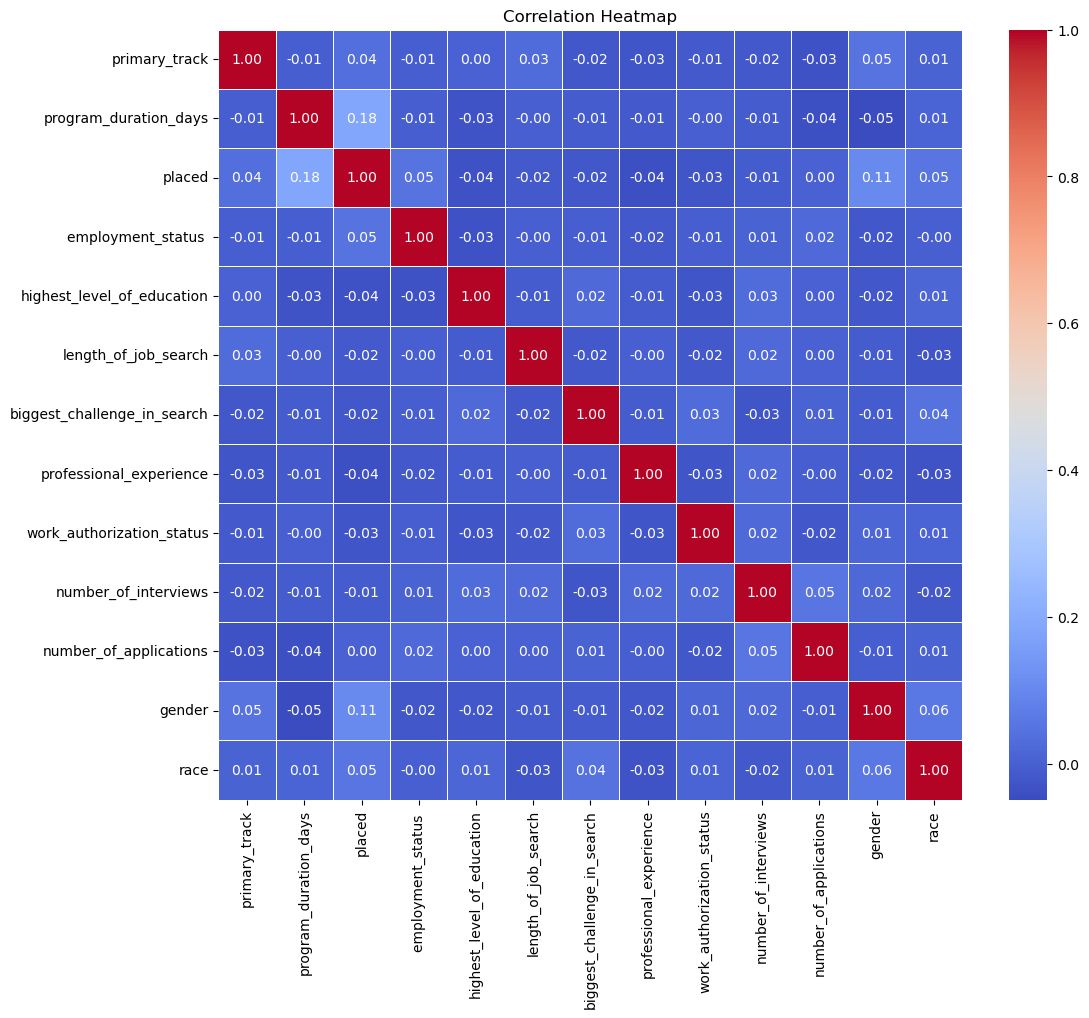

In [62]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Checking the balance of target

<Axes: xlabel='placed', ylabel='count'>

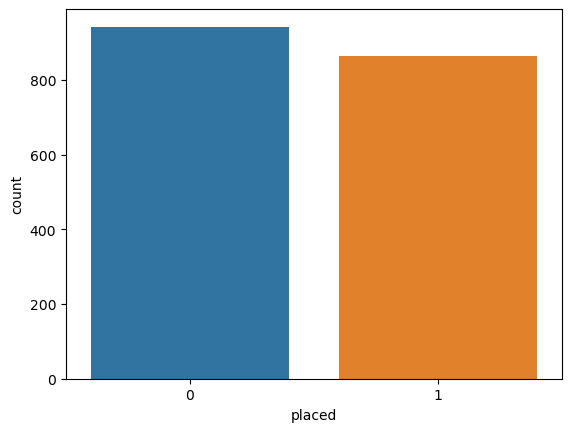

In [63]:
#To check the dataset balance
sns.countplot(x='placed',data=df)

# Classification Modeling

In [64]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc


# Defining X and Y and Standardization

In [65]:
X = df.drop("placed", axis=1)
y= df["placed"]

In [66]:
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(X)
x_scaled

array([[-1.57798929, -1.11715237, -0.55511787, ..., -1.14399056,
         0.77673855, -0.89902088],
       [-0.136783  , -1.11715237, -1.95805211, ..., -0.02227295,
         0.77673855, -1.31050282],
       [ 0.58382015, -1.11715237, -1.25658499, ..., -0.74017222,
         0.77673855, -1.72198477],
       ...,
       [-1.57798929,  2.58320425, -1.95805211, ..., -0.47096   ,
         0.77673855,  0.74690691],
       [-2.29859244,  2.83421312,  1.5492835 , ..., -0.82990963,
         0.77673855,  0.74690691],
       [ 0.58382015,  1.19050985,  0.14634926, ...,  1.99681873,
         0.77673855,  0.74690691]])

In [67]:
col=X.columns
X = pd.DataFrame(x_scaled, columns=col)
X

,primary_track,program_duration_days,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,-1.577989,-1.117152,-0.555118,1.170355,0.993278,-1.694501,1.069115,-0.712739,-0.924532,-1.143991,0.776739,-0.899021
1,-0.136783,-1.117152,-1.958052,-0.825711,0.993278,-1.216368,1.069115,-0.712739,1.755335,-0.022273,0.776739,-1.310503
2,0.583820,-1.117152,-1.256585,1.170355,0.993278,-0.260102,-0.374750,1.157425,-0.924532,-0.740172,0.776739,-1.721985
3,0.583820,-0.963308,-0.555118,-0.825711,0.993278,-1.216368,-1.096682,-0.712739,1.219362,-0.470960,-0.471986,-0.487539
4,0.583820,-1.011891,-1.256585,1.170355,0.993278,-1.216368,-0.374750,-0.712739,-0.924532,-0.695304,0.776739,-1.721985
...,...,...,...,...,...,...,...,...,...,...,...,...
1802,-0.136783,-1.117152,-1.256585,1.170355,0.993278,-1.694501,-0.374750,-0.712739,-0.924532,-0.246616,-1.720711,1.158389
1803,0.583820,-0.161699,-0.555118,1.170355,0.993278,0.696164,0.347183,3.027588,-0.388558,-0.022273,-1.720711,-0.076057
1804,-1.577989,2.583204,-1.958052,1.170355,0.258886,1.652430,0.347183,-0.712739,1.219362,-0.470960,0.776739,0.746907
1805,-2.298592,2.834213,1.549283,1.170355,-0.475505,0.218031,-1.096682,0.534037,-0.388558,-0.829910,0.776739,0.746907


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Define Classifiers

In [69]:

knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()

# Define parameter grids for GridSearchCV
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9]}
param_grid_rf = {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 7, 9]}
param_grid_lr = {'C': [0.1, 1, 10]}

# Perform GridSearchCV for each classifier
grid_knn = GridSearchCV(knn, param_grid_knn, cv=10)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=10)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=10)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=10)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=10)

# Fit the models
grid_knn.fit(X_train, y_train)
grid_svm.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})

In [70]:
# Print best hyperparameters for each model
print('Best hyperparameters for KNN:', grid_knn.best_params_)
print('Best hyperparameters for SVM:', grid_svm.best_params_)
print('Best hyperparameters for DT:', grid_dt.best_params_)
print('Best hyperparameters for RF:', grid_rf.best_params_)
print('Best hyperparameters for LR:', grid_lr.best_params_)

Best hyperparameters for KNN: {'n_neighbors': 7}
Best hyperparameters for SVM: {'C': 1, 'kernel': 'rbf'}
Best hyperparameters for DT: {'criterion': 'entropy', 'max_depth': 5}
Best hyperparameters for RF: {'max_depth': 5, 'n_estimators': 200}
Best hyperparameters for LR: {'C': 1}


# Training with best hyperparameters  

In [71]:
knn = KNeighborsClassifier(n_neighbors=grid_knn.best_params_['n_neighbors'])
svm = SVC(C=grid_svm.best_params_['C'], kernel=grid_svm.best_params_['kernel'])
dt = DecisionTreeClassifier(criterion=grid_dt.best_params_['criterion'], max_depth=grid_dt.best_params_['max_depth'])
rf = RandomForestClassifier(n_estimators=grid_rf.best_params_['n_estimators'], max_depth=grid_rf.best_params_['max_depth'])
lr = LogisticRegression(C=grid_lr.best_params_['C'])

In [72]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [73]:
svm.fit(X_train, y_train)

SVC(C=1)

In [74]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [75]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [76]:
lr.fit(X_train, y_train)

LogisticRegression(C=1)

# Evaluation of model 

In [77]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

# your code using KNN algorithm



## Initializing models, model_names and evaluation metrics
models = [knn, svm, dt, rf, lr]
model_names = ['KNN', 'SVM', 'DT', 'RF', 'LR']
accuracies = []
confusion_matrices = []
fprs = []
tprs = []
aucs = []

## Loop through models to make predictions using each model
for model in models:
    y_pred = model.predict(X_test)
    ## store evaluation metrics of each model
    accuracies.append(accuracy_score(y_test, y_pred))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc(fpr, tpr))


Model: KNN
Accuracy Score: 0.55


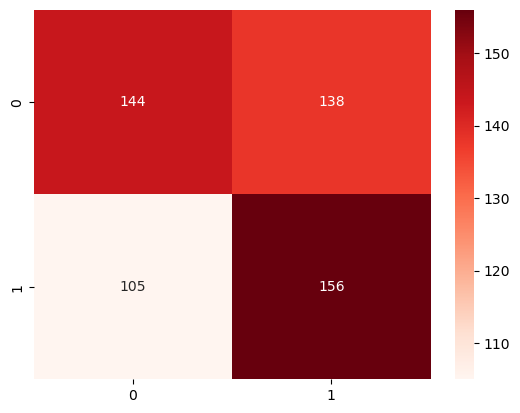

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.51      0.54       282
           1       0.53      0.60      0.56       261

    accuracy                           0.55       543
   macro avg       0.55      0.55      0.55       543
weighted avg       0.56      0.55      0.55       543
 

Model: SVM
Accuracy Score: 0.66


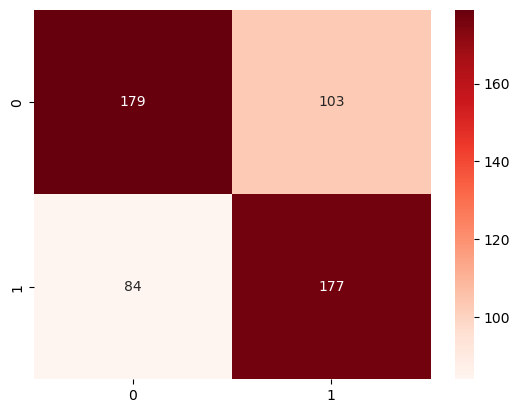

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.63      0.66       282
           1       0.63      0.68      0.65       261

    accuracy                           0.66       543
   macro avg       0.66      0.66      0.66       543
weighted avg       0.66      0.66      0.66       543
 

Model: DT
Accuracy Score: 0.71


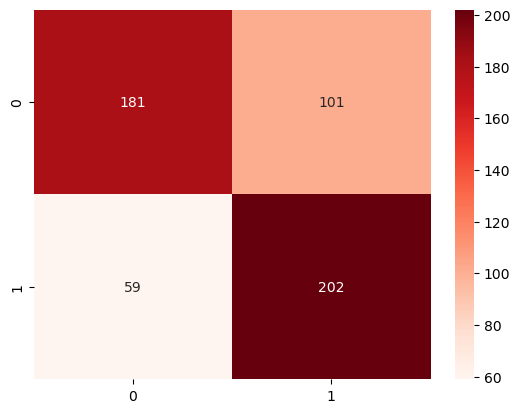

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       282
           1       0.67      0.77      0.72       261

    accuracy                           0.71       543
   macro avg       0.71      0.71      0.70       543
weighted avg       0.71      0.71      0.70       543
 

Model: RF
Accuracy Score: 0.73


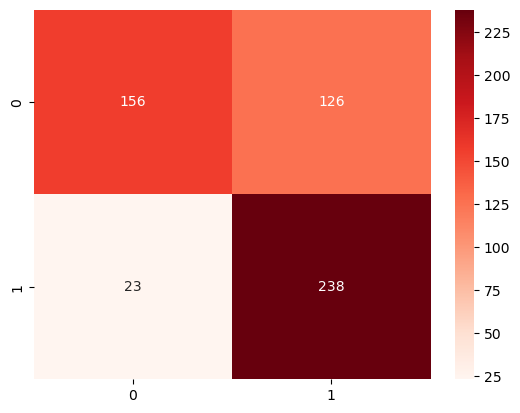

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.55      0.68       282
           1       0.65      0.91      0.76       261

    accuracy                           0.73       543
   macro avg       0.76      0.73      0.72       543
weighted avg       0.77      0.73      0.72       543
 

Model: LR
Accuracy Score: 0.60


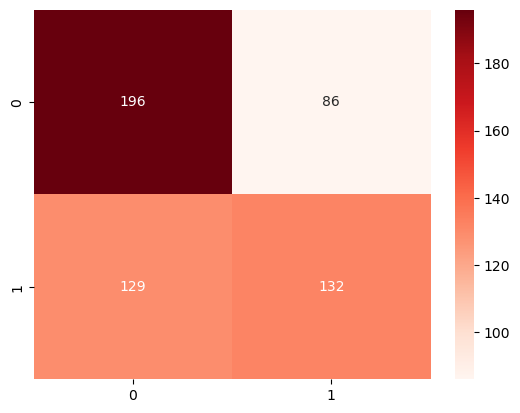

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.70      0.65       282
           1       0.61      0.51      0.55       261

    accuracy                           0.60       543
   macro avg       0.60      0.60      0.60       543
weighted avg       0.60      0.60      0.60       543
 



In [79]:
import seaborn as sns
from sklearn.metrics import classification_report

for i in range(len(models)):
    print(f"Model: {model_names[i]}")
    print(f"Accuracy Score: {accuracies[i]:.2f}")
    sns.heatmap(confusion_matrices[i], annot=True, cmap="Reds", fmt='d')
    plt.show()
    y_pred = models[i].predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred), "\n")

C:\Users\shima\AppData\Local\Temp\ipykernel_57748\3058899082.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color="red")


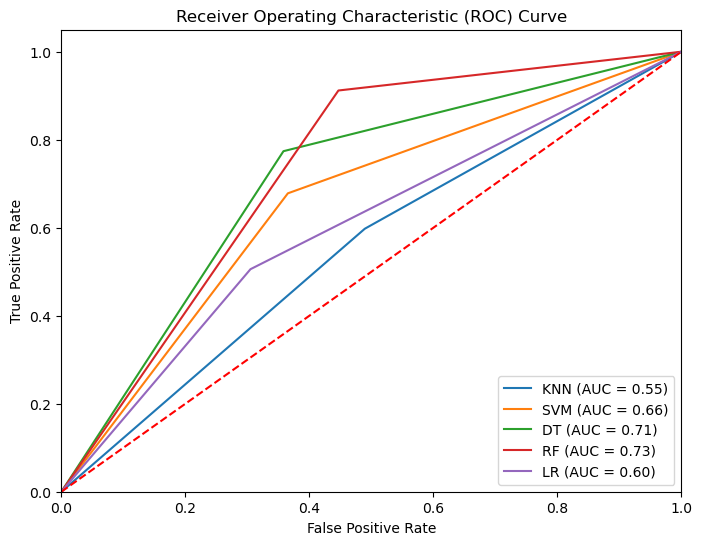

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
for i in range(len(models)):
    plt.plot(fprs[i], tprs[i], label=model_names[i] + " (AUC = {:.2f})".format(aucs[i]))
plt.plot([0, 1], [0, 1], 'k--', color="red")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [81]:
import pickle

In [82]:
pickle.dump(knn,open('pathrise-knn.pkl','wb'))
pickle.dump(svm,open('pathrise-svm.pkl','wb'))
pickle.dump(dt,open('pathrise-dt.pkl','wb'))
pickle.dump(rf,open('pathrise-rf.pkl','wb'))
pickle.dump(lr,open('pathrise-lr.pkl','wb'))